In [1]:
import tensorflow as tf

print("Dispositivos disponibles:")
print(tf.config.list_physical_devices('GPU'))


Dispositivos disponibles:
[]


(30, 128, 128, 1)


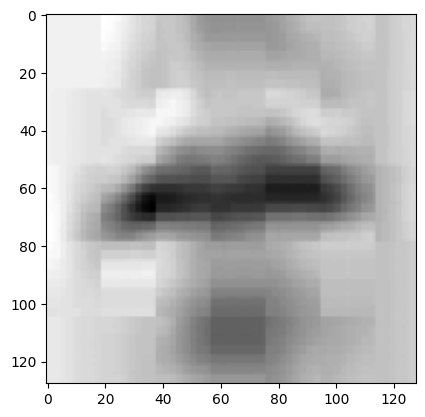

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar el archivo
arr = np.load(r"C:\Users\Raul\Documentos\GitHub\Lenguaje_labial\Dataset\data\arrays_np\grabacion_1_1_0000_aug1.npy")

# Mostrar forma
print(arr.shape)

# Visualizar un frame
plt.imshow(arr[0].squeeze(), cmap="gray")
plt.show()


In [10]:
import os

path = r"C:\Users\Raul\Documentos\GitHub\Lenguaje_labial\Dataset\data\frames_extraidos\grabacion_1_1_0000_aug1\frame_0010.png"
print("¿Existe?", os.path.exists(path))

¿Existe? True


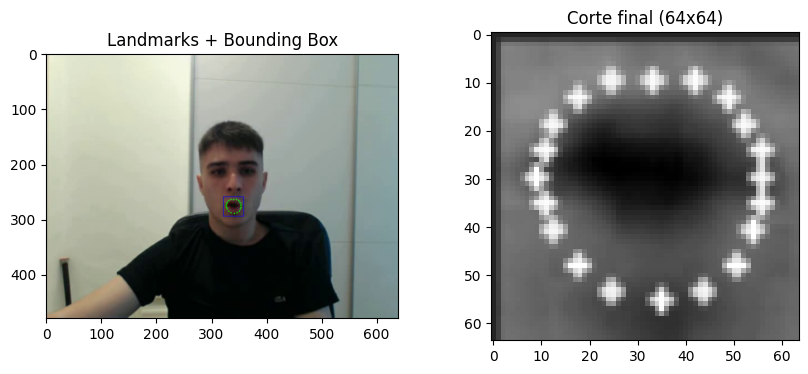

In [47]:
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt

# Cargar imagen (usa un frame cualquiera del .npy)
img = cv2.imread(r"C:\Users\Raul\Documentos\GitHub\Lenguaje_labial\Dataset\data\frames_extraidos\grabacion_1_1_0010_aug4\frame_0029.png")


mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(
    static_image_mode=True,
    refine_landmarks=True,          # 🎯 mejora precisión en labios
    max_num_faces=1,
    min_detection_confidence=0.5
)

results = face_mesh.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

if results.multi_face_landmarks:
    h, w, _ = img.shape
    landmarks = results.multi_face_landmarks[0].landmark

    # Puntos específicos de los labios
    lip_ids = [
        61, 185, 40, 39, 37, 0, 267, 269, 270, 409,
        291, 375, 321, 405, 314, 17, 84, 181, 91, 146
    ]


    xs = [int(point.x * w) for point in [landmarks[i] for i in lip_ids]]
    ys = [int(point.y * h) for point in [landmarks[i] for i in lip_ids]]


    # Bounding box ajustado solo a los labios
    padding = 5
    x_min = max(min(xs) - padding, 0)
    x_max = min(max(xs) + padding, w)
    y_min = max(min(ys) - padding, 0)
    y_max = min(max(ys) + padding, h)


    # Dibujar puntos y caja
    for x, y in zip(xs, ys):
        cv2.circle(img, (x, y), 1, (0, 255, 0), -1)
        cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (255, 0, 0), 1)

    # Recorte final
    mouth_crop = img[y_min:y_max, x_min:x_max]
    mouth_crop = cv2.resize(mouth_crop, (64, 64))
    mouth_crop_gray = cv2.cvtColor(mouth_crop, cv2.COLOR_BGR2GRAY)

    # Mostrar resultados
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title("Landmarks + Bounding Box")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.subplot(1, 2, 2)
    plt.title("Corte final (64x64)")
    plt.imshow(mouth_crop_gray, cmap="gray")
    plt.show()
else:
    print("⚠️ No se detectaron landmarks faciales.")


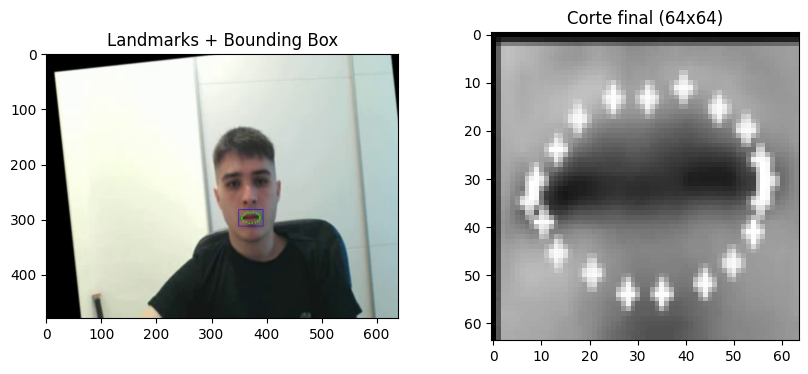

In [ ]:
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt

# Cargar imagen (usa un frame cualquiera del .npy)
img = cv2.imread(r"C:\Users\Raul\Documentos\GitHub\Lenguaje_labial\Dataset\data\frames_extraidos\grabacion_1_1_0000_aug1\frame_0007.png")


mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(
    static_image_mode=True,
    refine_landmarks=True,          # 🎯 mejora precisión en labios
    max_num_faces=1,
    min_detection_confidence=0.5
)

results = face_mesh.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

if results.multi_face_landmarks:
    h, w, _ = img.shape
    landmarks = results.multi_face_landmarks[0].landmark

    # Puntos específicos de los labios
    lip_ids = [
        61, 185, 40, 39, 37, 0, 267, 269, 270, 409,
        291, 375, 321, 405, 314, 17, 84, 181, 91, 146
    ]


    xs = [int(point.x * w) for point in [landmarks[i] for i in lip_ids]]
    ys = [int(point.y * h) for point in [landmarks[i] for i in lip_ids]]


    # Bounding box ajustado solo a los labios
    padding = 5
    x_min = max(min(xs) - padding, 0)
    x_max = min(max(xs) + padding, w)
    y_min = max(min(ys) - padding, 0)
    y_max = min(max(ys) + padding, h)


    # Dibujar puntos y caja
    for x, y in zip(xs, ys):
        cv2.circle(img, (x, y), 1, (0, 255, 0), -1)
        cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (255, 0, 0), 1)

    # Recorte final
    mouth_crop = img[y_min:y_max, x_min:x_max]
    mouth_crop = cv2.resize(mouth_crop, (64, 64))
    mouth_crop_gray = cv2.cvtColor(mouth_crop, cv2.COLOR_BGR2GRAY)

    # Mostrar resultados
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title("Landmarks + Bounding Box")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.subplot(1, 2, 2)
    plt.title("Corte final (64x64)")
    plt.imshow(mouth_crop_gray, cmap="gray")
    plt.show()
else:
    print("⚠️ No se detectaron landmarks faciales.")


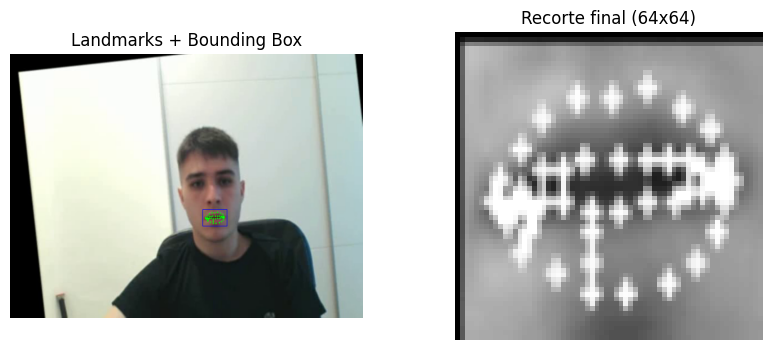

In [ ]:
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt

# Cargar imagen
img = cv2.imread(r"C:\Users\Raul\Documentos\GitHub\Lenguaje_labial\Dataset\data\frames_extraidos\grabacion_1_1_0000_aug1\frame_0007.png")

# Inicializar MediaPipe
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(
    static_image_mode=True,
    refine_landmarks=True,
    max_num_faces=1,
    min_detection_confidence=0.5
)

# Procesar imagen
results = face_mesh.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

if results.multi_face_landmarks:
    h, w, _ = img.shape
    landmarks = results.multi_face_landmarks[0].landmark

    # Puntos completos de la boca (externos, internos y extra)
    lip_ids = sorted(list(set([
        # Labios exteriores
        61, 185, 40, 39, 37, 0, 267, 269, 270, 409,
        291, 375, 321, 405, 314, 17, 84, 181, 91, 146,
        # Labios interiores
        78, 191, 80, 81, 82, 13, 312, 311, 310, 415,
        308, 324, 318, 402, 317, 14, 87, 178, 88, 95,


    ])))

    # Coordenadas de los landmarks
    xs = [int(landmarks[i].x * w) for i in lip_ids]
    ys = [int(landmarks[i].y * h) for i in lip_ids]

    # Bounding box
    padding = 5
    x_min = max(min(xs) - padding, 0)
    x_max = min(max(xs) + padding, w)
    y_min = max(min(ys) - padding, 0)
    y_max = min(max(ys) + padding, h)

    # Dibujar landmarks
    for i in lip_ids:
        x = int(landmarks[i].x * w)
        y = int(landmarks[i].y * h)
        cv2.circle(img, (x, y), 1, (0, 255, 0), -1)

    # Dibujar bounding box
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (255, 0, 0), 1)

    # Recorte y resize
    mouth_crop = img[y_min:y_max, x_min:x_max]
    mouth_crop = cv2.resize(mouth_crop, (64, 64))
    mouth_crop_gray = cv2.cvtColor(mouth_crop, cv2.COLOR_BGR2GRAY)

    # Mostrar resultados
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title("Landmarks + Bounding Box")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Recorte final (64x64)")
    plt.imshow(mouth_crop_gray, cmap="gray")
    plt.axis("off")
    plt.show()

else:
    print("⚠️ No se detectaron landmarks faciales.")


In [30]:
image = cv2.imread(r"C:\Users\Raul\Documentos\GitHub\Lenguaje_labial\Dataset\data\frames_extraidos\grabacion_1_1_0000_aug1\frame_0007.png")
if image is None:
    raise ValueError("⚠️ No se pudo cargar la imagen. Verifica la ruta.")

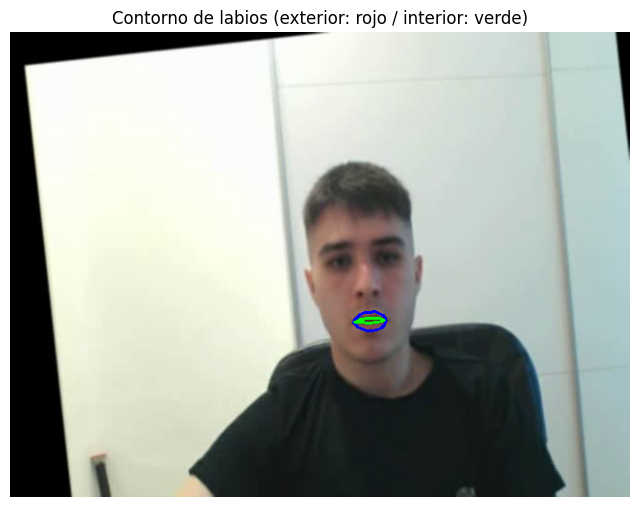

In [35]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

# --- Inicialización de MediaPipe ---
mp_face_mesh = mp.solutions.face_mesh

# --- Índices de landmarks de labios (según tu imagen) ---
lips_outer = [
    61, 185, 40, 39, 37, 0, 267, 269, 270, 409, 291,
    375, 321, 405, 314, 17, 84, 181, 91, 146, 61
]

lips_inner = [
    78, 191, 80, 81, 82, 13, 312, 311, 310, 415, 308,
    324, 318, 402, 317, 14, 87, 178, 88, 95, 78
]

# --- Función para dibujar líneas entre puntos ---
def draw_lip_connections(image, landmarks, indices, color=(0, 255, 0), thickness=1):
    h, w, _ = image.shape
    for i in range(len(indices) - 1):
        p1 = landmarks[indices[i]]
        p2 = landmarks[indices[i + 1]]

        x1, y1 = int(p1.x * w), int(p1.y * h)
        x2, y2 = int(p2.x * w), int(p2.y * h)

        cv2.line(image, (x1, y1), (x2, y2), color, thickness)

# --- Cargar imagen (cambia la ruta según tu caso) ---
image_path = r"C:\Users\Raul\Documentos\GitHub\Lenguaje_labial\Dataset\data\frames_extraidos\grabacion_1_1_0000_aug1\frame_0007.png"
image = cv2.imread(image_path)

if image is None:
    raise ValueError("⚠️ No se pudo cargar la imagen. Verifica la ruta.")

h, w, _ = image.shape
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# --- Procesamiento con FaceMesh ---
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    refine_landmarks=True,
    max_num_faces=1,
    min_detection_confidence=0.5
) as face_mesh:
    results = face_mesh.process(image_rgb)

    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            # Dibujar contornos
            draw_lip_connections(image, face_landmarks.landmark, lips_outer, color=(255, 0, 0), thickness=2)
            draw_lip_connections(image, face_landmarks.landmark, lips_inner, color=(0, 255, 0), thickness=2)

# --- Mostrar con matplotlib ---
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Contorno de labios (exterior: rojo / interior: verde)")
plt.axis("off")
plt.show()
